# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
Mouse_metadata_path = "data/Mouse_metadata.csv"
Study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# Combine the data into a single DataFrame
MMM = pd.merge(Study_results, Mouse_metadata, how = "left", on = 'Mouse ID')

# Write it to a new CSV file
MMM.to_csv('MMM.csv')

# Display the data table for preview
MMM.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = MMM["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = MMM[MMM.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
MMM.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MMM_nodups = MMM.loc[MMM["Mouse ID"] != "g989"]
MMM_nodups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
MMM_nodups_mouse_count = MMM_nodups["Mouse ID"].nunique()
MMM_nodups_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
MMM_nodups_mean = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
MMM_nodups_median = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
MMM_nodups_var = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
MMM_nodups_std = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
MMM_nodups_sem = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
MMM_summary_df = pd.DataFrame({"Mean Tumor Volume": MMM_nodups_mean,
                                "Median Tumor Volume": MMM_nodups_median,
                               "Tumor Volume Variance": MMM_nodups_var,
                              "Tumor Volume Std. Dev.": MMM_nodups_std,
                              "Tumor Volume Std. Err.": MMM_nodups_sem})
MMM_summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
MMM_summary_agg = MMM_nodups.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
MMM_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

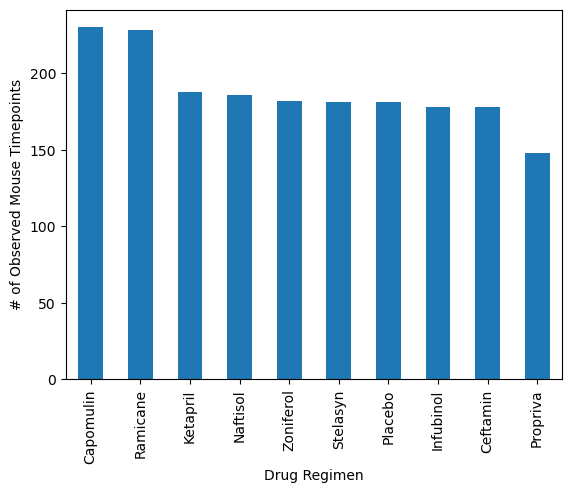

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MMM_bar = MMM_nodups["Drug Regimen"].value_counts()
MMM_bar.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

<function matplotlib.pyplot.show(close=None, block=None)>

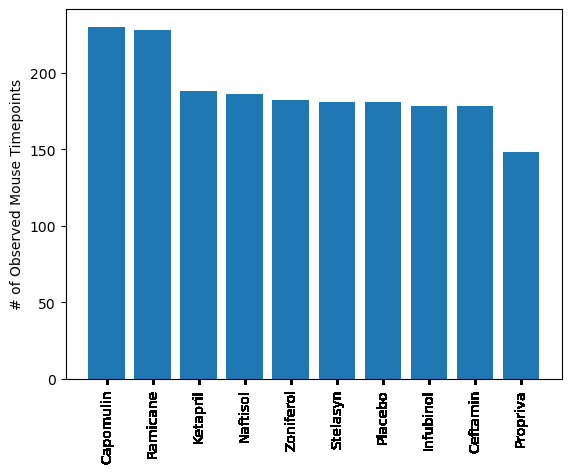

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
MMM_bar_py = MMM_nodups['Drug Regimen'].value_counts()
plt.bar(MMM_bar_py.index, MMM_bar_py.values)
plt.xticks(MMM_nodups["Drug Regimen"], rotation="vertical")
plt.ylabel('# of Observed Mouse Timepoints')
plt.show

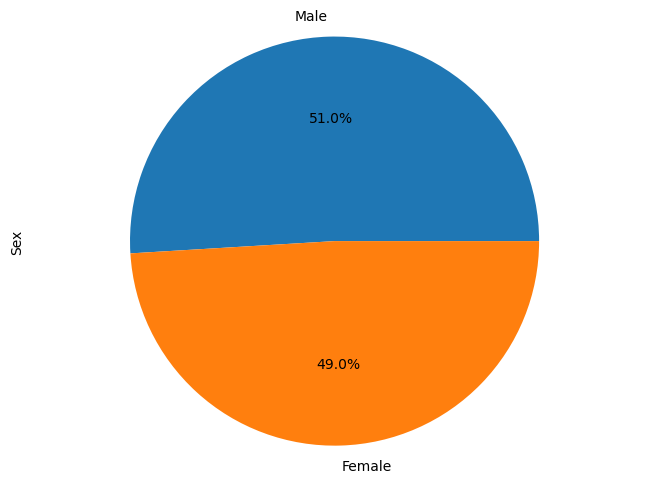

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
f_vs_m = pd.value_counts(MMM_nodups['Sex'])
f_vs_m.plot(kind="pie", y="Sex", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.show()

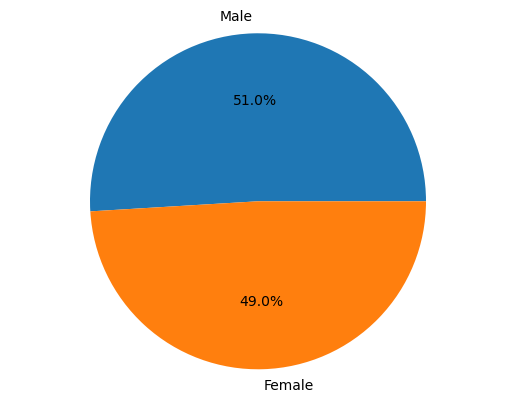

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(f_vs_m, labels=["Male", "Female"], autopct='%1.1f%%')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = MMM_nodups.groupby(['Drug Regimen', 'Timepoint', 'Mouse ID']).last()['Tumor Volume (mm3)']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_Tumor_Volume_merged = pd.merge(MMM_nodups, tumor_volume, on=["Timepoint", "Mouse ID"])
Final_Tumor_Volume_merged

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.000000
1,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000
2,g107,0,45.000000,0,Ketapril,Female,2,29,45.000000
3,a457,0,45.000000,0,Ketapril,Female,11,30,45.000000
4,c819,0,45.000000,0,Ketapril,Male,21,25,45.000000
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,58.634971


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = Final_Tumor_Volume_merged.groupby(['Drug Regimen', 'Tumor Volume (mm3)_x']).last()

# Create empty list to fill with tumor vol data (for plotting)
TV = Final_Tumor_Volume_merged.groupby('Tumor Volume (mm3)_x')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Treatments.quantile([.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for drug in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    print(f"{'Drug Regimen'}'s potential outliers: {Final_Tumor_Volume_merged.loc['Drug Regimn'][(Final_Tumor_Volume_merged.loc['Drug Regimen'] < lowerq) | (Final_Tumor_Volume_merged.loc['Drug Regimen'] > upperq)]}")

C:\Users\yvedu\AppData\Local\Temp\ipykernel_33520\3482373134.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = Treatments.quantile([.25, 0.5, 0.75])


KeyError: 0.25

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel(Final_Tumor_Volume_merged).item("Tumor Volume (mm3)_y")
ax1.boxplot(Treatments)
plt.show()

SyntaxError: invalid syntax (2692290962.py, line 3)

## Line and Scatter Plots

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Set x axis to Tumor Volume (mm3)_y
x_axis_data = np.arange(len(TV))
points = Treatments.groupby('Drug Regimen')['Capomulin']
plt.plot(x_axis_data, points)
plt.show()

KeyError: 'Column not found: Capomulin'

In [58]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(MMM_nodups)['Weight (g)'],MMM_nodups['Tumor Volume (mm3)'],c=MMM_nodups['Drug Regimen']
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

ValueError: too many values to unpack (expected 3)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
